<a href="https://colab.research.google.com/github/joaochenriques/IST_MCTE/blob/main/StreamTurbines/BladeDesign_V01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import pathlib, subprocess
from scipy.optimize import minimize

def cmdcall( cmd, verbose = False ):
    output = subprocess.getoutput( cmd )
    if verbose: print(output)

In [53]:
if not pathlib.Path("mpl_utils.py").exists():
  cmdcall( "curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py" )

import mpl_utils as mut
mut.config_plots()

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

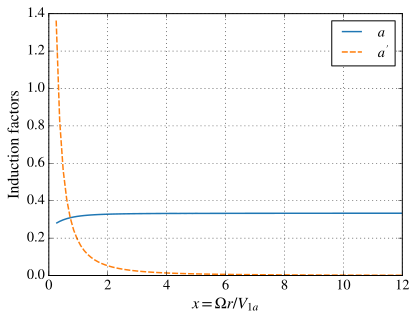

In [56]:
def objective_a( X, x ):
    a  = X[0]
    ap = X[1]
    fO = ( 1.0 - a ) * ap * x**3
    return -fO

def constraint_a( X, x ):
    a  = X[0]
    ap = X[1]
    fC = ( 1.0 + ap ) * ap * x**2 - ( 1.0 - a ) * a
    return fC

x_vec = []
a_vec = []
ap_vec = []

X0 = ( 0.2, 1 )

for x in np.linspace( 0.25, 12.0, 100 ):
    f_objt = lambda X : objective_a( X, x )
    f_cons = lambda X : constraint_a( X, x )

    cons = [ { 'type': 'eq', 'fun': f_cons } ]
    sol = minimize( f_objt, X0, method = 'SLSQP', constraints = cons )
    X0 = sol.x

    x_vec.append( x )
    a_vec.append( sol.x[0] )
    ap_vec.append( sol.x[1] )

mpl.plot( x_vec, a_vec, label = '$a$' )
mpl.plot( x_vec, ap_vec, label = "$a'$" )
mpl.xlabel( "$x=\\Omega r/V_{1a}$")
mpl.ylabel( "Induction factors")
mpl.legend()
mpl.grid()

In [27]:
def params( x, c, r ):

    ϕ = x
    # c = x[1]
    Z = 3
    σ = Z * c / ( 2 * np.pi * r )

    CL = 1.0
    CD = 0.0
    k = 1.0

    Ca = CL * np.cos(ϕ) + CD * np.sin(ϕ)
    Ct = CL * np.sin(ϕ) - CD * np.cos(ϕ)

    a  = ( σ * Ca ) / ( 4.0 * k * np.sin(ϕ)**2 + σ * Ca )
    ap = ( σ * Ct ) / ( 4.0 * k * np.sin(ϕ)*np.cos(ϕ) - σ * Ct )

    return k, a, ap

def objective( x, c, r ):
    k, a, ap = params( x, c, r )
    fO = k * ap * ( 1.0 - a ) * r**3

    return -fO

def constraint( x, c, r ):
    V1a = 2.25
    Ω = 15 * np.pi / 30.0
    k, a, ap = params( x, c, r )

    fC = ( 1.0 + ap ) * ap * ( Ω * r / V1a )**2 - ( 1 - a ) * a

    return fC

In [28]:
x0 = 0.1

ϕ_bound = ( 0.0, np.pi/2.0 )
c_bound = ( 0.1, 2.0 )

r = 8.0
c = 1.
bnds = ( ϕ_bound, )
# cons = [ { 'type': 'eq', 'fun': lambda x: constraint( x, c, r ) } ]

sol = minimize( objective, x0, args=(c,r,), method = 'SLSQP', bounds = bnds )#, constraints = cons )

print(sol)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -992.1125662979499
       x: [ 1.548e+00]
     nit: 35
     jac: [-1.289e+05]
    nfev: 88
    njev: 31


In [30]:
sol.x

array([1.54817605])